In [49]:
#library and functions
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader, random_split

In [50]:
import torch
import torch.nn as  nn
import torch.optim as optim

In [51]:
#transformer and dataset
transform = transforms.Compose([
    transforms.ToTensor(),
])

train_dataset = CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = CIFAR10(root='./data', train=False, transform=transform, download=True)



Files already downloaded and verified
Files already downloaded and verified


In [52]:
#spliting train dataset into train and validation
validation_split = 0.2
train_size = int((1 - validation_split) * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])


In [53]:
train_dataset

In [54]:
import numpy as np
import matplotlib.pyplot as plt

In [55]:
train_dataset[0][0][0] #datate is in tensor

tensor([[0.6471, 0.4549, 0.3176,  ..., 0.6588, 0.4745, 0.3216],
        [0.3333, 0.4353, 0.2824,  ..., 0.5608, 0.7294, 0.6039],
        [0.3725, 0.4824, 0.2745,  ..., 0.2824, 0.4824, 0.5922],
        ...,
        [0.4980, 0.3608, 0.3843,  ..., 0.3137, 0.5529, 0.4314],
        [0.5333, 0.4824, 0.3922,  ..., 0.3725, 0.3961, 0.3333],
        [0.5647, 0.5647, 0.4353,  ..., 0.2980, 0.1647, 0.2627]])

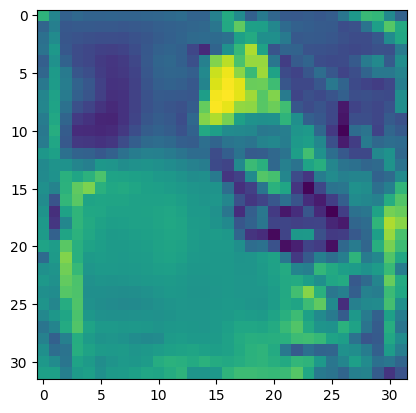

In [56]:
plt.imshow(train_dataset[0][0][0]) #after transformation image change .it may be image of aeroplane

In [57]:
help(train_dataset)

Help on Subset in module torch.utils.data.dataset object:

class Subset(Dataset)
 |  Subset(dataset: torch.utils.data.dataset.Dataset[+T_co], indices: Sequence[int]) -> None
 |  
 |  Subset of a dataset at specified indices.
 |  
 |  Args:
 |      dataset (Dataset): The whole Dataset
 |      indices (sequence): Indices in the whole set selected for subset
 |  
 |  Method resolution order:
 |      Subset
 |      Dataset
 |      typing.Generic
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __getitem__(self, idx)
 |  
 |  __getitems__(self, indices: List[int]) -> List[+T_co]
 |  
 |  __init__(self, dataset: torch.utils.data.dataset.Dataset[+T_co], indices: Sequence[int]) -> None
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  __len__(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data and other attributes defined here:
 |  
 |  __annotations__ = {'dataset': torch.utils.data.dataset.Dataset[+T_co],.

In [58]:
train_dataset.__len__()

40000

In [59]:
#loader
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [60]:
class ConvNN(nn.Module):
  def __init__(self,in_channels=3,output_target=10):
    super(ConvNN,self).__init__()
    #layer 1
    self.layer1=nn.Sequential(
        nn.Conv2d(in_channels=3,out_channels=16,kernel_size=(3,3),padding=(1,1),stride=(1,1)),
        nn.LeakyReLU(negative_slope=0.01),
        nn.AdaptiveAvgPool2d((10,10))##AdaptiveAvgPool2d change output to 10*10 matrix with variable channel

    )
    #layer 2
    self.layer2=nn.Sequential(
        nn.Conv2d(in_channels=16,out_channels=10,kernel_size=(3,3),stride=(1,1),padding=(1,1)),
        nn.LeakyReLU(negative_slope=0.01),
        nn.AdaptiveAvgPool2d((1,1))##AdaptiveAvgPool2d change output to 1*1 matrix with variable channel
    )


  def forward(self,x):
    x=self.layer1(x)
    x=self.layer2(x)

    return x




In [61]:
model=ConvNN()

In [62]:
#parameter and  optiizer
optimizer = optim.Adam(model.parameters(), lr=0.0003)
criterion = nn.CrossEntropyLoss()

In [63]:
#training greedy layer
#training layer 1 not 2
#freezing layer 2
for param in model.layer2.parameters():
    param.requires_grad = False

In [68]:

#training layer 1
train_losses = []
epochs=20
for epoch in range(epochs):

    total_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.reshape(outputs.shape[0],-1), labels)#reshape output for loss calculation
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    train_losses.append(average_loss)

    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.reshape(outputs.shape[0],-1), labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    average_loss = total_loss / len(val_loader)
    accuracy = correct_predictions / total_samples


    print(f'Epoch [{epoch+1}/{epochs}], Loss: {average_loss:.4f}')
    print(f'Validation Loss: {average_loss:.4f}, Accuracy: {accuracy * 100:.3f}%')





Epoch [1/20], Loss: 2.2835
Validation Loss: 2.2835, Accuracy: 629.180%
Epoch [2/20], Loss: 2.2810
Validation Loss: 2.2810, Accuracy: 628.600%
Epoch [3/20], Loss: 2.2786
Validation Loss: 2.2786, Accuracy: 629.080%
Epoch [4/20], Loss: 2.2767
Validation Loss: 2.2767, Accuracy: 629.130%
Epoch [5/20], Loss: 2.2748
Validation Loss: 2.2748, Accuracy: 628.740%
Epoch [6/20], Loss: 2.2730
Validation Loss: 2.2730, Accuracy: 628.570%
Epoch [7/20], Loss: 2.2714
Validation Loss: 2.2714, Accuracy: 628.850%
Epoch [8/20], Loss: 2.2701
Validation Loss: 2.2701, Accuracy: 629.520%
Epoch [9/20], Loss: 2.2687
Validation Loss: 2.2687, Accuracy: 629.090%
Epoch [10/20], Loss: 2.2676
Validation Loss: 2.2676, Accuracy: 629.230%
Epoch [11/20], Loss: 2.2660
Validation Loss: 2.2660, Accuracy: 628.840%
Epoch [12/20], Loss: 2.2651
Validation Loss: 2.2651, Accuracy: 628.830%
Epoch [13/20], Loss: 2.2639
Validation Loss: 2.2639, Accuracy: 629.900%
Epoch [14/20], Loss: 2.2628
Validation Loss: 2.2628, Accuracy: 628.800%
E

In [69]:
#Unfreezing layer 2
for param in model.layer2.parameters():
    param.requires_grad = True

#freezing layer1

for param in model.layer1.parameters():
    param.requires_grad = False


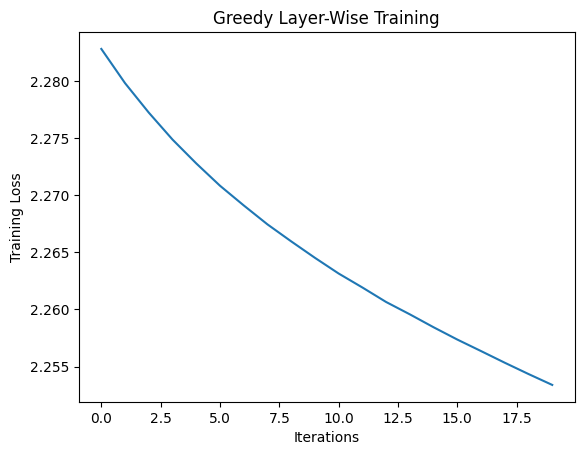

In [70]:
#plot the train loss with  each epoch
plt.plot(train_losses)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Greedy Layer-Wise Training')
plt.show()

In [71]:

#training layer 1
train_losses2 = []
#took 20 epochs becaouse 10 was ending with more slope
epochs=20
for epoch in range(epochs):

    total_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.reshape(outputs.shape[0],-1), labels)#outputs.reshape(outputs.shape[0],-1 is neccesary to calculate loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    train_losses2.append(average_loss)

    model.eval()  # Set the model to evaluation mode
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0
##validation after each epoch
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs.reshape(outputs.shape[0],-1), labels)
            total_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

    average_loss = total_loss / len(val_loader)
    accuracy = correct_predictions / total_samples

    print(f'Epoch [{epoch+1}/{epochs}], Loss: {average_loss:.4f}')
    print(f'Validation Loss: {average_loss:.4f}, Accuracy: {accuracy * 100:.2f}%')

Epoch [1/20], Loss: 2.0529
Validation Loss: 2.0529, Accuracy: 650.82%
Epoch [2/20], Loss: 2.0203
Validation Loss: 2.0203, Accuracy: 649.02%
Epoch [3/20], Loss: 1.9955
Validation Loss: 1.9955, Accuracy: 652.08%
Epoch [4/20], Loss: 1.9791
Validation Loss: 1.9791, Accuracy: 654.64%
Epoch [5/20], Loss: 1.9668
Validation Loss: 1.9668, Accuracy: 657.15%
Epoch [6/20], Loss: 1.9595
Validation Loss: 1.9595, Accuracy: 651.49%
Epoch [7/20], Loss: 1.9497
Validation Loss: 1.9497, Accuracy: 654.40%
Epoch [8/20], Loss: 1.9387
Validation Loss: 1.9387, Accuracy: 658.38%
Epoch [9/20], Loss: 1.9326
Validation Loss: 1.9326, Accuracy: 659.09%
Epoch [10/20], Loss: 1.9260
Validation Loss: 1.9260, Accuracy: 655.31%
Epoch [11/20], Loss: 1.9246
Validation Loss: 1.9246, Accuracy: 652.75%
Epoch [12/20], Loss: 1.9176
Validation Loss: 1.9176, Accuracy: 657.80%
Epoch [13/20], Loss: 1.9171
Validation Loss: 1.9171, Accuracy: 652.54%
Epoch [14/20], Loss: 1.9047
Validation Loss: 1.9047, Accuracy: 656.18%
Epoch [15/20], 

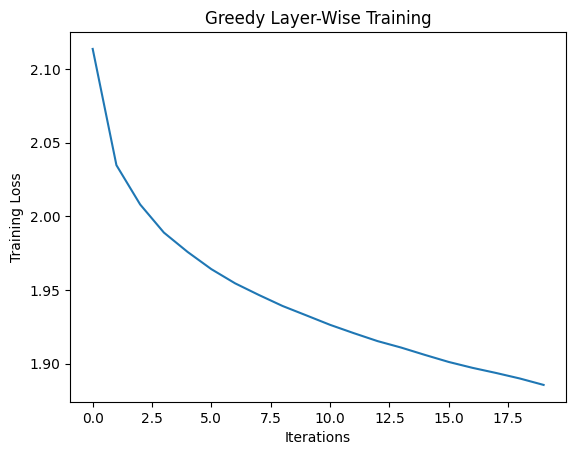

In [73]:
plt.plot(train_losses2)
plt.xlabel('Iterations')
plt.ylabel('Training Loss')
plt.title('Greedy Layer-Wise Training-')
plt.show()

In [ ]:
#Unfreezing layer 1
for param in model.layer1.parameters():
    param.requires_grad = True

In [72]:
model.eval()

# Evaluate the model on the test set
correct = 0
total = 0

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total * 100
print(f'Test Accuracy: {accuracy:.4f}%')

Test Accuracy: 664.2400%
